In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

FRvideos = pd.read_csv("FRvideos_cc50_202101.csv")


In [ ]:
filasFRvideos = FRvideos.shape[0]

In [ ]:
print(FRvideos.head())

      video_id trending_date  \
0  Ro6eob0LrCY      17.14.11   
1  Yo84eqYwP98      17.14.11   
2  ceqntSXE-10      17.14.11   
3  WuTFI5qftCE      17.14.11   
4  ee6OFs8TdEg      17.14.11   

                                               title        channel_title  \
0           Malika LePen : Femme de Gauche - Trailer  Le Raptor Dissident   
1  LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...              Le Labo   
2  DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...      Daniil le Russe   
3                    PAPY GRENIER - METAL GEAR SOLID    Joueur Du Grenier   
4  QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...    Aurelien Fontenoy   

   category_id              publish_time  \
0           24  2017-11-13T17:32:55.000Z   
1           24  2017-11-12T15:00:02.000Z   
2           23  2017-11-13T17:00:38.000Z   
3           20  2017-11-12T17:00:02.000Z   
4           17  2017-11-13T16:30:03.000Z   

                                                tags   views  likes  dislikes  

In [ ]:
val_nulos = FRvideos.isnull().sum()
print(val_nulos)

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               2912
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64


In [ ]:
FRvideos['description'].fillna('No description', inplace=True)

In [ ]:
val_nulos = FRvideos.isnull().sum()
print(val_nulos)

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
state                     0
lat                       0
lon                       0
geometry                  0
dtype: int64


# Por Categoria de Videos

¿Qué categorías de videos son las de mayor tendencia?

In [ ]:
# Contar la frecuencia de cada categoría
frecuencia_categorias = FRvideos['category_id'].value_counts()

In [ ]:
# Mostrar las categorías más comunes y su frecuencia
print("Categorías más comunes y su frecuencia:")
print(frecuencia_categorias)

Categorías más comunes y su frecuencia:
24    9819
22    5719
23    4343
17    4342
10    3946
25    3752
26    2361
1     2157
20    1459
28     802
27     769
2      673
15     237
19     119
29     114
43      99
30      11
44       2
Name: category_id, dtype: int64


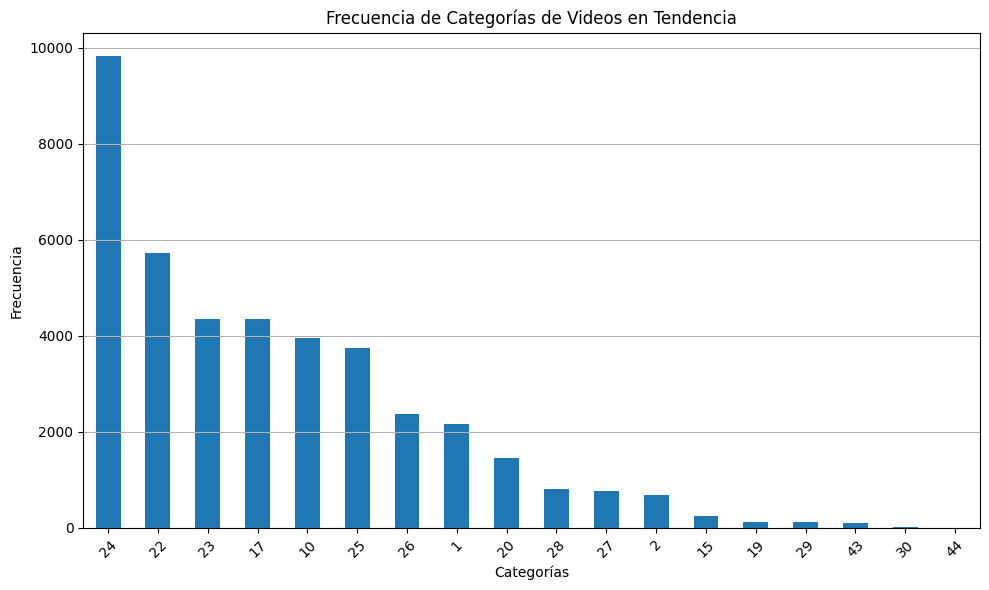

In [ ]:
# Graficar la frecuencia de las categorías
plt.figure(figsize=(10, 6))
frecuencia_categorias.plot(kind='bar')
plt.title('Frecuencia de Categorías de Videos en Tendencia')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

In [ ]:
# Calcula el recuento de videos por categoría
category_counts = FRvideos['category_id'].value_counts()

In [ ]:
# Ordena las categorías por su recuento (de mayor a menor)
category_counts_sorted = category_counts.sort_values(ascending=False)

In [ ]:
# Top 10 categorías más populares
top_categories = category_counts_sorted.head(10)

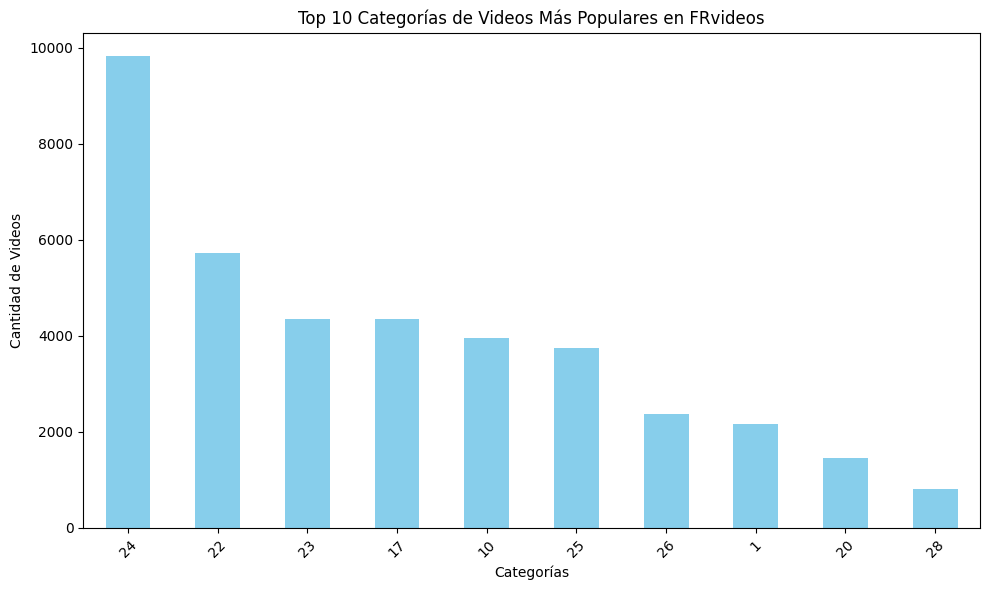

In [ ]:
# Gráfico de barras para las 10 categorías más populares
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categorías de Videos Más Populares en FRvideos')
plt.xlabel('Categorías')
plt.ylabel('Cantidad de Videos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Bottom 10 categorías menos populares
bottom_categories = category_counts_sorted.tail(10)

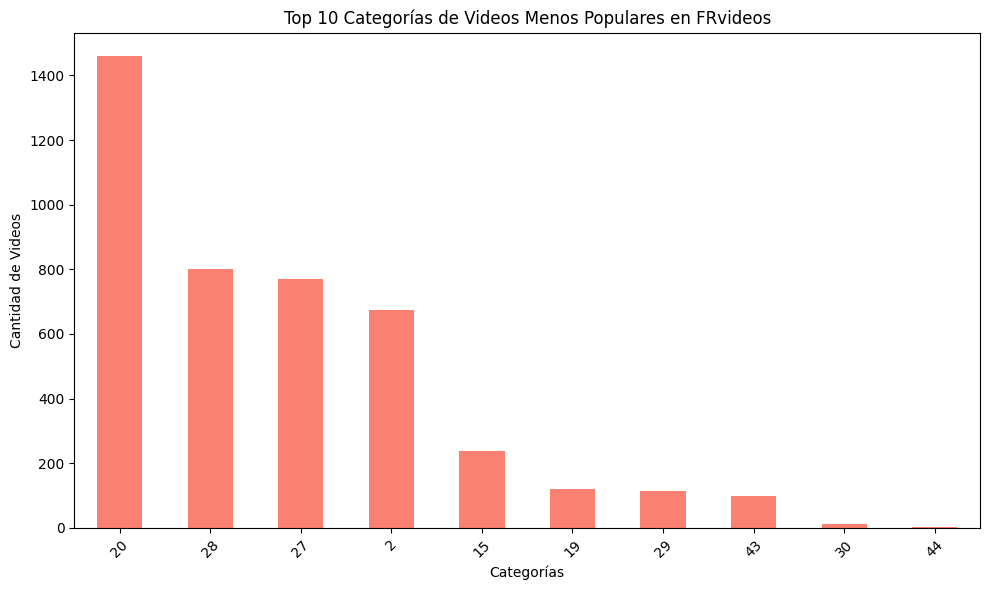

In [ ]:
# Gráfico de barras para las 10 categorías menos populares
plt.figure(figsize=(10, 6))
bottom_categories.plot(kind='bar', color='salmon')
plt.title('Top 10 Categorías de Videos Menos Populares en FRvideos')
plt.xlabel('Categorías')
plt.ylabel('Cantidad de Videos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No megusta”?

In [ ]:
# Agrupar por categoría y sumar los Me gusta y No me gusta
likes_dislikes_sum = FRvideos.groupby('category_id')[['likes', 'dislikes']].sum()

In [ ]:
# Calcular la proporción de Me gusta a No me gusta
likes_dislikes_sum['like_dislike_ratio'] = likes_dislikes_sum['likes'] / likes_dislikes_sum['dislikes']

In [ ]:
# Ordenar por la proporción (mayor a menor)
likes_dislikes_sum = likes_dislikes_sum.sort_values(by='like_dislike_ratio', ascending=False)

print(likes_dislikes_sum)

                 likes  dislikes  like_dislike_ratio
category_id                                         
19              871774     10980           79.396539
27             8302644    201359           41.233041
23           130805444   3391288           38.571022
28            18513625    511858           36.169455
2              1606767     52260           30.745637
15             1335449     44591           29.948846
10           277314234   9772318           28.377529
26            15519633    643543           24.115922
30               24295      1048           23.182252
1             24631422   1092744           22.540890
44                 192         9           21.333333
20            22502704   1097458           20.504387
17            43964560   2145956           20.487167
22            28927705   1760711           16.429559
25             9301486    775868           11.988490
24           118243560  10351578           11.422757
29             5987384   1231113            4.

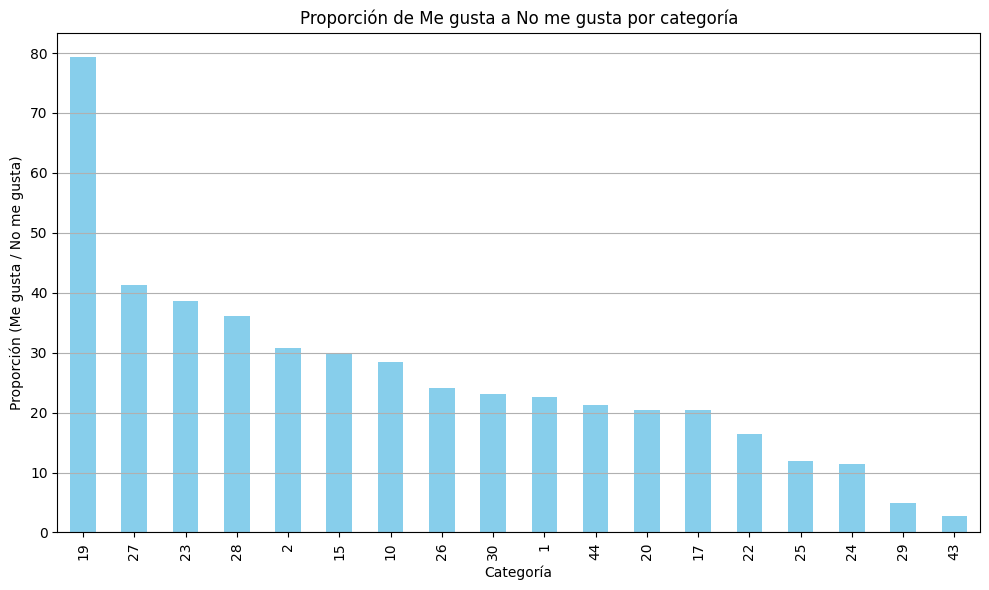

In [ ]:
# Graficar la proporción de Me gusta a No me gusta por categoría
plt.figure(figsize=(10, 6))
likes_dislikes_sum['like_dislike_ratio'].plot(kind='bar', color='skyblue')
plt.title('Proporción de Me gusta a No me gusta por categoría')
plt.xlabel('Categoría')
plt.ylabel('Proporción (Me gusta / No me gusta)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” /“Comentarios”?

In [ ]:
# Agrupar por categoría y sumar las vistas y los comentarios

filtered_data = FRvideos[FRvideos['comment_count'] != 0]

views_comments_sum = filtered_data.groupby('category_id')[['views', 'comment_count']].sum()


In [ ]:
# Calcular la proporción de Vistas a Comentarios
views_comments_sum['views_comments_ratio'] = views_comments_sum['views'] / views_comments_sum['comment_count']

In [ ]:
# Ordenar por la proporción (mayor a menor)
views_comments_sum = views_comments_sum.sort_values(by='views_comments_ratio', ascending=False)

print(views_comments_sum)

                  views  comment_count  views_comments_ratio
category_id                                                 
43             51823901          44882           1154.670046
30              1028214           1467            700.895706
17           1989382610        4575418            434.798003
1             896004484        2841655            315.310790
22           1133021060        4104818            276.022240
26            468016274        1759358            266.015373
25            454635780        1896101            239.774031
24           3712893513       15729924            236.040143
15             43331172         187590            230.988709
23           1891550595        9136814            207.025184
10           5005986284       25446289            196.727558
2              36058183         207973            173.379155
27            119197230         768074            155.189773
28            440001941        2926363            150.357950
20            443025725 

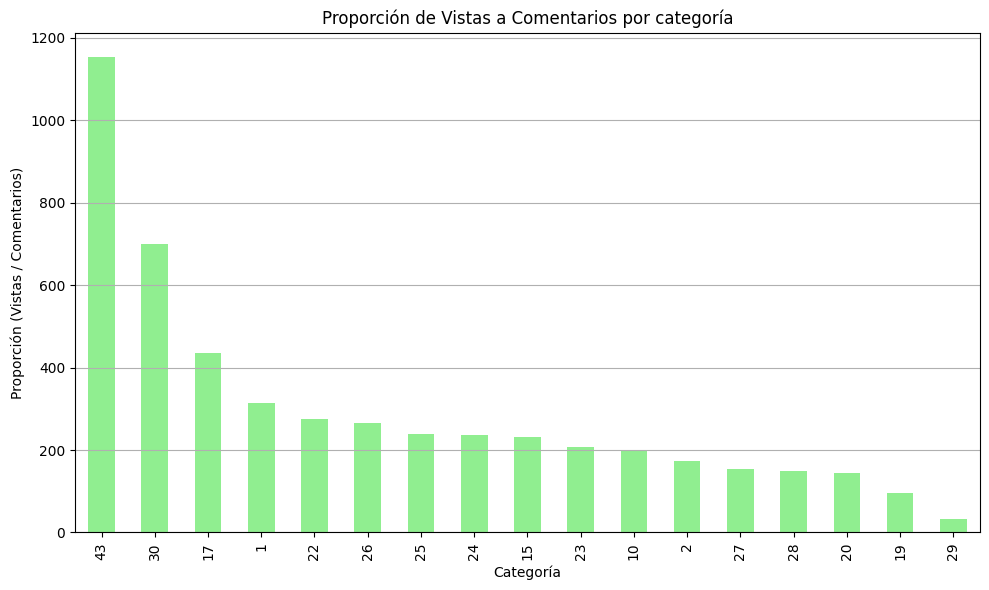

In [ ]:
# Graficar la proporción de Vistas a Comentarios por categoría
plt.figure(figsize=(10, 6))
views_comments_sum['views_comments_ratio'].plot(kind='bar', color='lightgreen')
plt.title('Proporción de Vistas a Comentarios por categoría')
plt.xlabel('Categoría')
plt.ylabel('Proporción (Vistas / Comentarios)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()